# Лабораторная работа №2
Выполнила: *Девятерикова А.В.*  
группа: *М8О-401Б-18*  


In [3]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

Зададим распределение Тьюки и построим график возможного распределения

In [4]:
def TukeyDistribution(mu, sigma=30, delta=0.01, N=1000):
    u = np.random.normal(mu, 1, N)
    v = np.random.normal(mu, sigma, N)
    w = np.random.uniform(0, 1, N)
    x = []
    for i in range(N):
        if w[i] > delta:
            x.append(u[i])
        else:
            x.append(v[i])
    return x        

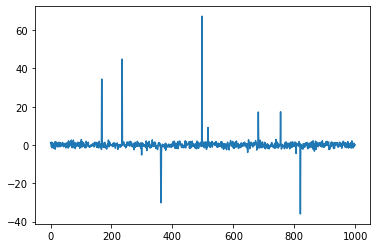

In [5]:
plt.plot(TukeyDistribution(0))

Функции критериев Стьюдента и Уилкоксона

In [6]:
def Student(x, y, alpha=0.05):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    lx = len(x)
    ly = len(y)
    sX2 = np.sum((x - x_mean) ** 2) / lx
    sY2 = np.sum((y - y_mean) ** 2) / ly
    
    T = (x_mean - y_mean) / np.sqrt(sX2 / lx + sY2 / ly)
    df = round((sX2 / lx + sY2 / ly) ** 2 / (((sX2 / lx) ** 2) / (lx - 1) + ((sY2 / ly) ** 2) / (ly - 1)))
    a, b = ss.t(df=df).ppf((0.5 * alpha, 1 - 0.5 * alpha))
    #return ss.t.cdf(abs(t_value), df)) * 2, 3)
    return T > a and T < b


def Wilcoxon(x, y, alpha=0.05):
    lx = len(x)
    ly = len(y)
    r = ss.rankdata(x+y)
    W = np.sum(r[lx:])
    muW = 0.5 * ly * (lx + ly + 1)
    k = np.sqrt(1 / 12 * lx * ly * (lx + ly + 1))
    res = (W - muW) / k
    
    return res > ss.norm.ppf(0.5 * alpha) and res < ss.norm.ppf(1 - 0.5 * alpha)

Напишем функцию для проведения теста

In [14]:
num_test = 500

def test(muX=0, muY=0.5, sigma=5, delta=0.1, N=1000):
    #delta = np.linspace(0.1, 1, 100)
    student = 0
    wilcoxon = 0
    for i in range(num_test):
        X = TukeyDistribution(muX, sigma, delta, N)
        Y = TukeyDistribution(muY, sigma, delta, N)
        student += int(Student(X, Y))
        wilcoxon += int(Wilcoxon(X, Y))
    res_s, res_w = student / num_test, wilcoxon / num_test
    return res_s, res_w

In [12]:
def graph(num, mX=0, mY=0.5, sigma=5):
    student_errors = []
    wilcoxon_errors = []
    X = range(num)
    d = np.linspace(0.1, 1, num)

    for i in range(num):
        t = test(mX, mY, sigma, d[i])
        student_errors.append(t[0])
        wilcoxon_errors.append(t[1])

    fig = plt.figure(figsize=(17, 7))
    plt.grid() 
    plt.plot(X, student_errors, color='black', label='Критерий Стьюдента')
    plt.plot(X, wilcoxon_errors, color='blue',  label='Критерий Вилкоксона')
    plt.legend()
    plt.show()

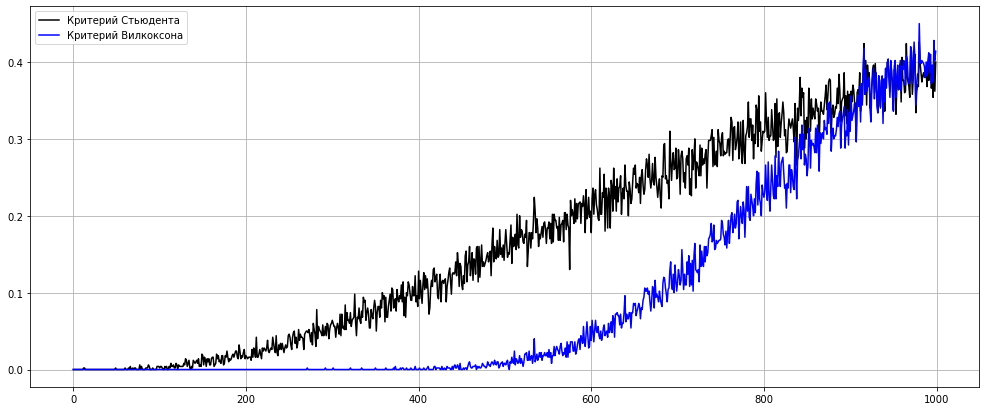

In [16]:
graph(1000)

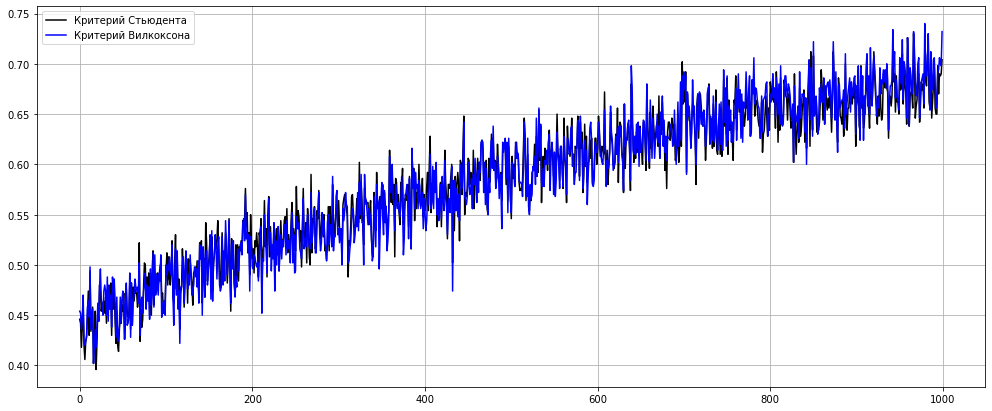

In [18]:
graph(1000, 0, 0.1, 1.5)